In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import random
import math
from scipy import stats

In [9]:
# Load data file
df4 = pd.read_csv('/content/pdata.csv')
df4.head()

,gene_id,gene_name,gene_type,H358_Pooled,H358_SC05,H358_SC09,H358_SC10,H358_SC11,H358_SC12,H358_SC14,H358_SC16,H358_SC17,H358_SC18,H358_SC23,H358_SC24,H358_SC25,H358_SC29,H358_SC32,H358_SC34,H358_SC38,H358_SC39,H358_SC42,H358_SC44,H358_SC52,H358_SC53,H358_SC55,H358_SC57,H358_SC59,H358_SC62,H358_SC63,H358_SC65,H358_SC67,H358_SC68,H358_SC69,H358_SC70,H358_SC71,H358_SC73,H358_SC74,H358_SC75,H358_SC76,...,LC-MBT-15_SC34,LC-MBT-15_SC41,LC-MBT-15_SC42,LC-MBT-15_SC45,LC-MBT-15_SC50,LC-MBT-15_SC51,LC-MBT-15_SC52,LC-MBT-15_SC54,LC-MBT-15_SC55,LC-MBT-15_SC56,LC-MBT-15_SC57,LC-MBT-15_SC58,LC-MBT-15_SC59,LC-MBT-15_SC60,LC-MBT-15_SC62,LC-MBT-15_SC63,LC-MBT-15_SC64,LC-MBT-15_SC65,LC-MBT-15_SC67,LC-MBT-15_SC71,LC-MBT-15_SC72,LC-MBT-15_SC73,LC-MBT-15_SC74,LC-MBT-15_SC75,LC-MBT-15_SC76,LC-MBT-15_SC78,LC-MBT-15_SC79,LC-MBT-15_SC80,LC-MBT-15_SC84,LC-MBT-15_SC85,LC-MBT-15_SC87,LC-MBT-15_SC89,LC-MBT-15_SC92,LC-MBT-15_SC94,LC-MBT-15_SC95,LC-MBT-15_SC96,LC-PT-45-mock,LC-PT-45-Selumetinib_R0,LC-PT-45-Selumetinib_R3,LC-PT-45-Selumetinib_R7
0,ENSG00000237851.1,RP1-67K17.4,lincRNA,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
1,ENSG00000225538.1,OR5BE1P,pseudogene,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
2,ENSG00000257527.1,MIR3179-3,lincRNA,5.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,10.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.74,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.04,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.59,0.0,1.62
3,ENSG00000212855.5,TTTY2,lincRNA,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
4,ENSG00000225193.5,RPS12P26,pseudogene,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.47,0.0,0.0,0.0,0.0,0.0,20.89,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,24.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.3,0.00,0.0,0.00


In [10]:
from sklearn.linear_model import LinearRegression

def getadjr2(sc, blk):
  model = LinearRegression()
  X, y = sc, blk
  model.fit(X, y)
  # compute with formulas from the theory
  yhat = model.predict(X)
  SS_Residual = sum((y-yhat)**2)       
  SS_Total = sum((y-np.mean(y))**2)     
  r_squared = 1 - (float(SS_Residual))/SS_Total
  adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
  
  # compute with sklearn linear_model, although could not find any function to compute adjusted-r-square directly from documentation
  return adjusted_r_squared

In [11]:
def getthousandr2(s,e,b,n):
  valr = pd.DataFrame(df4.values[:, 3:], columns=[str(i) for i in range(201)])
  arr = []
  
  # valr[['0','1','2']]
  # print(valr[:, 1:6],

  # print([random.randint(s,e) for i in range(n)])
  for i in range(1000):
    rdm = [str(random.randint(s,e)) for i in range(n)]
    ndf = valr[rdm]
    arr.append(getadjr2(ndf.values, valr.values[:,b]))
  return arr

In [13]:
# this code section may take upto 5-q0 mins to execute
r2arr1 = []
valr = pd.DataFrame(df4.values[:, 3:], columns=[str(i) for i in range(201)])
ns = [5,15,25,35]
for i in ns:
  r2arr1.append(getthousandr2(1,51,0,i))
r2arr1 = np.array(r2arr1)
print(r2arr1.shape)

(4, 1000)


In [14]:
# this code section may take upto 3-5 mins to execute
r2arr2 = []
valr = pd.DataFrame(df4.values[:, 3:], columns=[str(i) for i in range(201)])
ns = [5,15,25,34]
for i in ns:
  r2arr2.append(getthousandr2(57,91,55,i))

r2arr2 = np.array(r2arr2)
print(r2arr2.shape)

(4, 1000)


In [15]:
# this code section may take upto 3-5 mins to execute
r2arr3 = []
valr = pd.DataFrame(df4.values[:, 3:], columns=[str(i) for i in range(201)])
ns = [5,15,25,35]
for i in ns:
  r2arr3.append(getthousandr2(98,141,97,i))

r2arr3 = np.array(r2arr3)
print(r2arr3.shape)

(4, 1000)


In [16]:
def showscatterplots(avg, pool, col, cell):
  plt.style.use("ggplot")
  fig, ax = plt.subplots(figsize=(5,5))
  # plt.rcParams["figure.figsize"] = (5,5)
  sns.scatterplot(x=avg, y=pool, color=col) # scatter plot of x vs y, in our case 3rd dimension vs 18th dimension
  lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
  ax.plot(lims, lims, 'k-', alpha=0.75, zorder=1)
  ax.set_title('Scatter plot')
  ax.set_xlabel('Avg of single cells [Log2(TPM+1)]')
  ax.set_ylabel('Bulk cell ' + cell + '\n[Log2(TPM+1)]')
  #Adding text inside a rectangular box by using the keyword 'bbox'
  # print(avg.values, pool.values)
  pcor = round(stats.pearsonr(avg.values, pool.values)[0],2)
  scor = round(stats.spearmanr(avg.values, pool.values)[0],2)
  plt.text(-1, 11, 'Pearson r = ' + str(pcor) + '\nSpearman r = ' + str(scor), fontsize = 10)
  plt.show()

In [17]:
valr = pd.DataFrame(df4.values[:, 3:], columns=[str(i) for i in range(201)])
valr['avg_h358'] = np.log2(valr.iloc[:,1:51].mean(axis=1).astype('float64')+1)
valr['avg_lt'] = np.log2(valr.iloc[:,57:91].mean(axis=1).astype('float64')+1)
valr['avg_lt_re'] = np.log2(valr.iloc[:,98:141].mean(axis=1).astype('float64')+1)
valr['log2_h358'] = np.log2(valr['0'].astype('float64')+1)
valr['log2_lt'] = np.log2(valr['55'].astype('float64')+1)
valr['log2_lt_re'] = np.log2(valr['97'].astype('float64')+1)

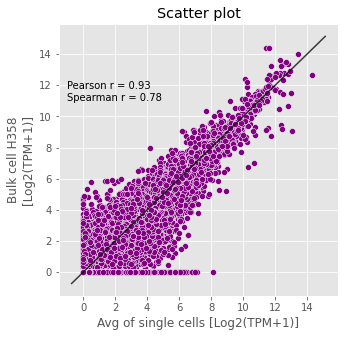

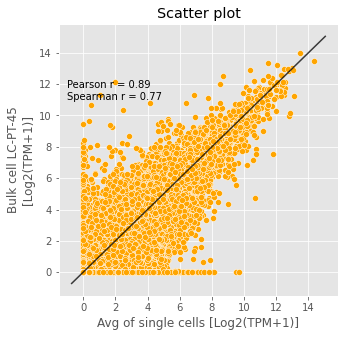

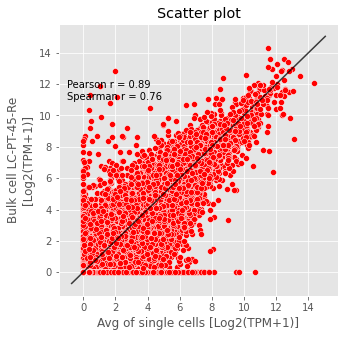

In [20]:
# Plot Fig. 1 A
showscatterplots(valr['avg_h358'], valr['log2_h358'], 'purple', "H358")
showscatterplots(valr['avg_h358'], valr['log2_lt'], 'orange', 'LC-PT-45')
showscatterplots(valr['avg_h358'], valr['log2_lt_re'], 'red', 'LC-PT-45-Re')

In [21]:
def showhistplot(dtf, col1, col2, cell, bin):
  # dtf = pd.DataFrame(npa)
  # print(dtf)
  # print(dtf.corr(method ='pearson'))
  a = np.array(dtf.astype(float).corr().unstack())
  b = a[a!=1.0]
  # print(dtf.corr())
  kde = stats.gaussian_kde(b)
  xx = np.linspace(0, 1, 1000)
  fig, ax = plt.subplots(figsize=(5,5))
  ax.hist(b, histtype='step', color=col1, density=True, bins=bin, range=(0, 1), fill=True)
  ax.set_xlabel('Inter correlation (Pearson r)\nof gene expression between single cells\n' + cell, fontweight='bold', fontsize=12)
  ax.set_ylabel('Count', fontweight='bold', fontsize=12)
  ax.set_xlim(0.3,1)
  ax.plot(xx, kde(xx), color=col2)

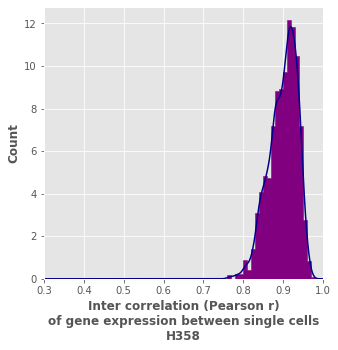

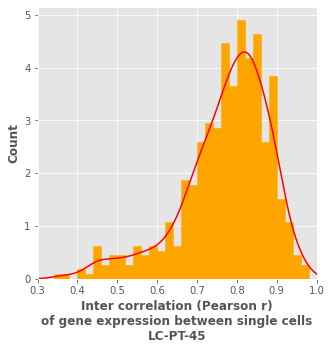

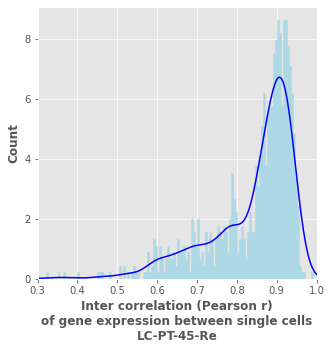

In [22]:
# Plot Fig 1. B
valr = pd.DataFrame(df4.values[:, 3:], columns=[str(i) for i in range(201)])

showhistplot(valr.iloc[:,1:51], 'purple', 'darkblue', 'H358', 100)
showhistplot(valr.iloc[:,57:91], 'orange', 'red', 'LC-PT-45', 50)
showhistplot(valr.iloc[:,98:141], 'lightblue', 'blue', 'LC-PT-45-Re', 200)

In [23]:
# import library & dataset
import seaborn as sns
def showboxplots(r2arr, col, ylab, idx):
  # Just switch x and y
  dfr2 = pd.DataFrame(r2arr, index=idx)
  props = dict(boxes=col, whiskers=col, medians="Black", caps="Black")
  ax = dfr2.T.boxplot(vert=False, color=props, patch_artist=True)
  plt.subplots_adjust(left=0.25)
  ax.set_xlim(0,1)
  ax.set_ylabel(ylab)
  plt.show()


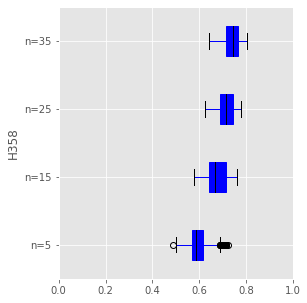

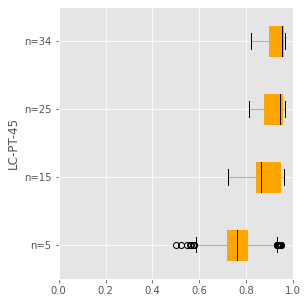

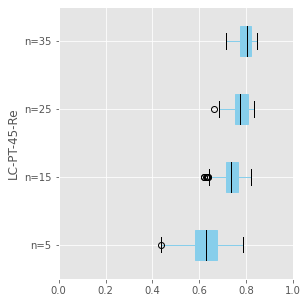

In [26]:
# Plot Fig 1. C
plt.rcParams["figure.figsize"] = (5,5)
showboxplots(r2arr1, 'blue', 'H358', ['n=5', 'n=15', 'n=25', 'n=35'])
showboxplots(r2arr2, 'orange', 'LC-PT-45', ['n=5', 'n=15', 'n=25', 'n=34'])
showboxplots(r2arr3, 'skyblue', 'LC-PT-45-Re', ['n=5', 'n=15', 'n=25', 'n=35'])